### ***Amazon Prime Video Analysis***

The dataset contains information about Amazon Prime Video content with **9668** entries and **12** columns. Here's an overview of the dataset structure:

### ***Columns***:

**show_id**: Unique identifier for each show.

**type**: Type of the content (e.g., Movie, TV Show).

**title**: Title of the content.

**director**: Director(s) of the content.

**cast**: Main cast members.

**country**: Country of origin.

**date_added**: Date when the content was added to Amazon Prime Video.

**release_year**: Year of release.

**rating**: Content rating (e.g., PG, R).

**duration**: Duration of the content (e.g., in minutes for movies, seasons/episodes for TV shows).

**listed_in**: Categories or genres the content is listed under.

**description**: Short description of the content.

### ***Tasks to perform***

**Director** and **cast** have some missing values.

**Country** and **date_added** have significant numbers of missing values.

**Rating** has a few missing values.

Most columns are of type **object (string)**, with release_year as **int64** and date_added as **datetime64**.

To **visualize** the insights generated from the EDA.


In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [128]:
file_path = "./amazon.csv"
df = pd.read_csv(file_path, parse_dates=True)



# Display the first few rows of the dataframe and summary information

In [129]:

print(df.head())
print(df.info())
print(df.describe(include='all'))

  show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

       date_added  release_year rating duration                listed_in  \
0  March 30, 2021          2014    NaN  113 min            Comedy, Drama   
1  March 30, 2021          2018    13+  110 min     Drama, Interna

# Fill missing values in 'director' and 'cast' with 'Unknown'

In [130]:


df['cast'].fillna('Unknown', inplace=True)

C:\Users\abini\AppData\Local\Temp\ipykernel_25956\741117312.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cast'].fillna('Unknown', inplace=True)


# Fill missing values in 'rating' with the mode

In [131]:

df['rating'].fillna(df['rating'].mode()[0], inplace=True)



C:\Users\abini\AppData\Local\Temp\ipykernel_25956\522615211.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mode()[0], inplace=True)


# Drop rows with missing 'country' and 'date_added' values

In [132]:

df.dropna(subset=['country', 'date_added'], inplace=True)

# Convert 'date_added' to datetime

In [133]:

df['date_added'] = pd.to_datetime(df['date_added'])


# 1. Distribution of Movies and TV Shows

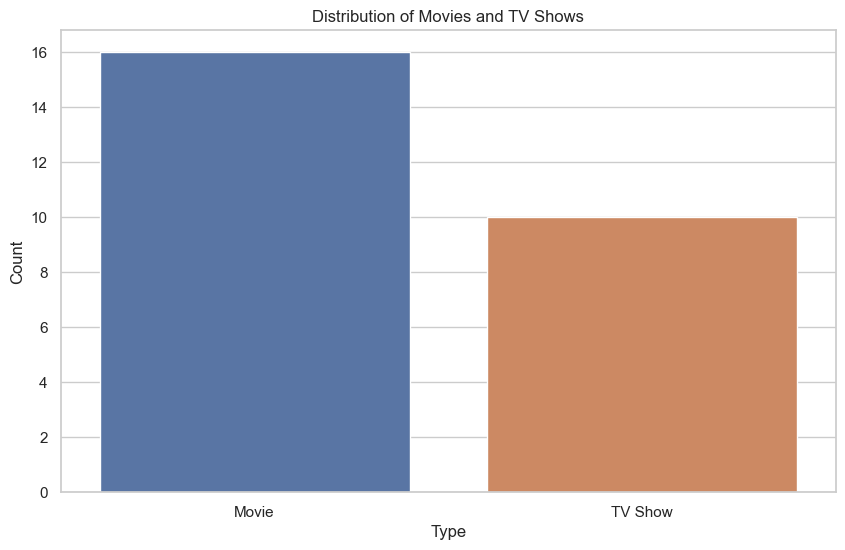

In [134]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# 2. Top 10 Countries with the Most Titles

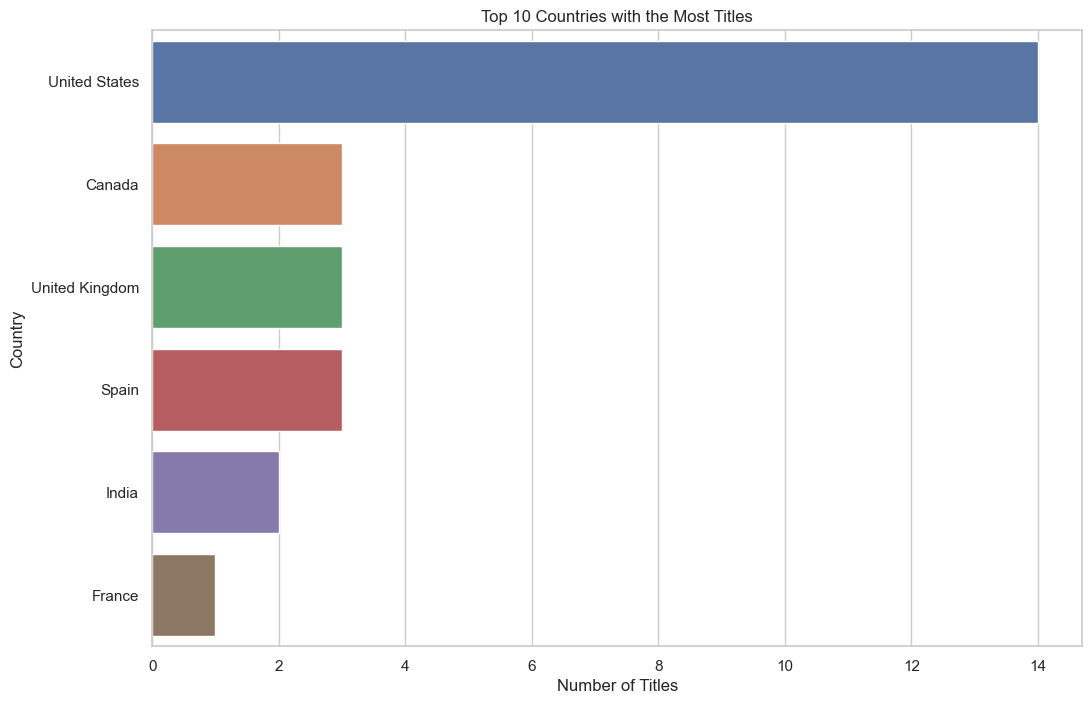

In [135]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

# 3. Distribution of Release Years

c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


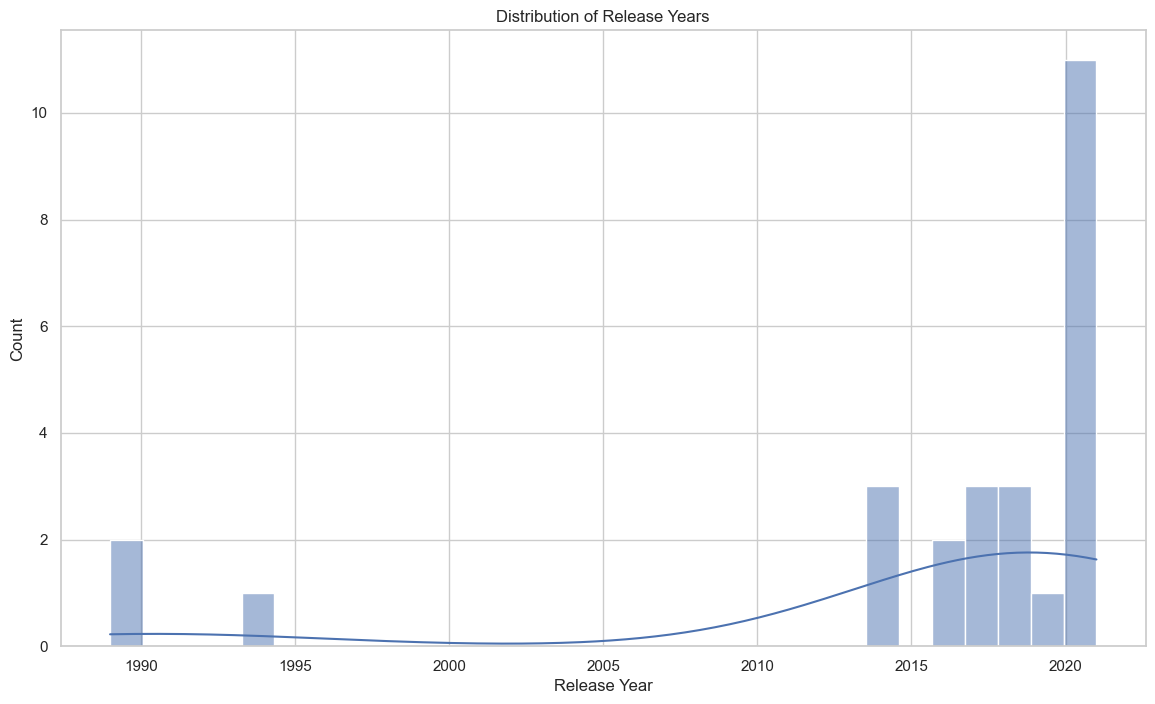

In [136]:
plt.figure(figsize=(14, 8))
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# 4. Distribution of Ratings

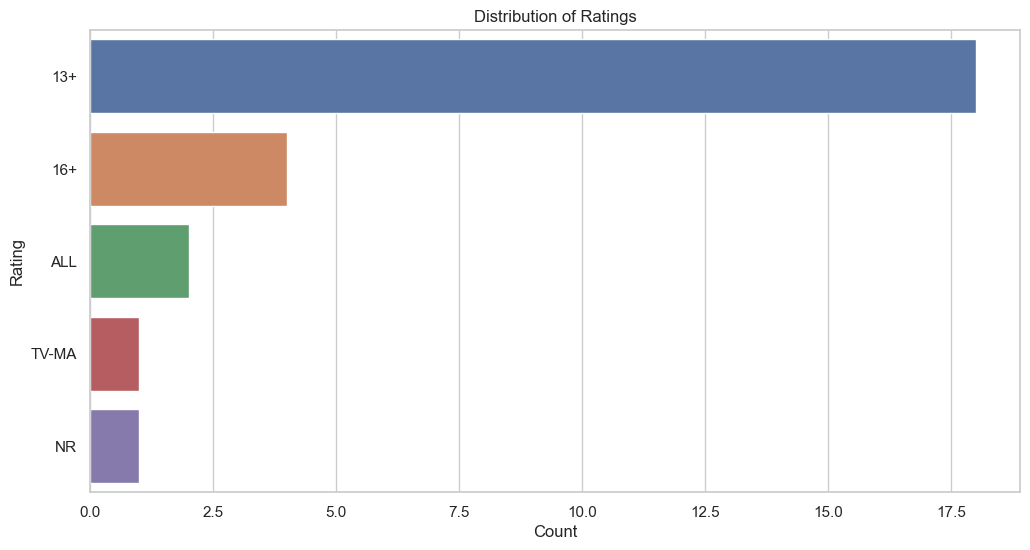

In [137]:
plt.figure(figsize=(12, 6))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

# 5. Top 10 Directors with the Most Titles

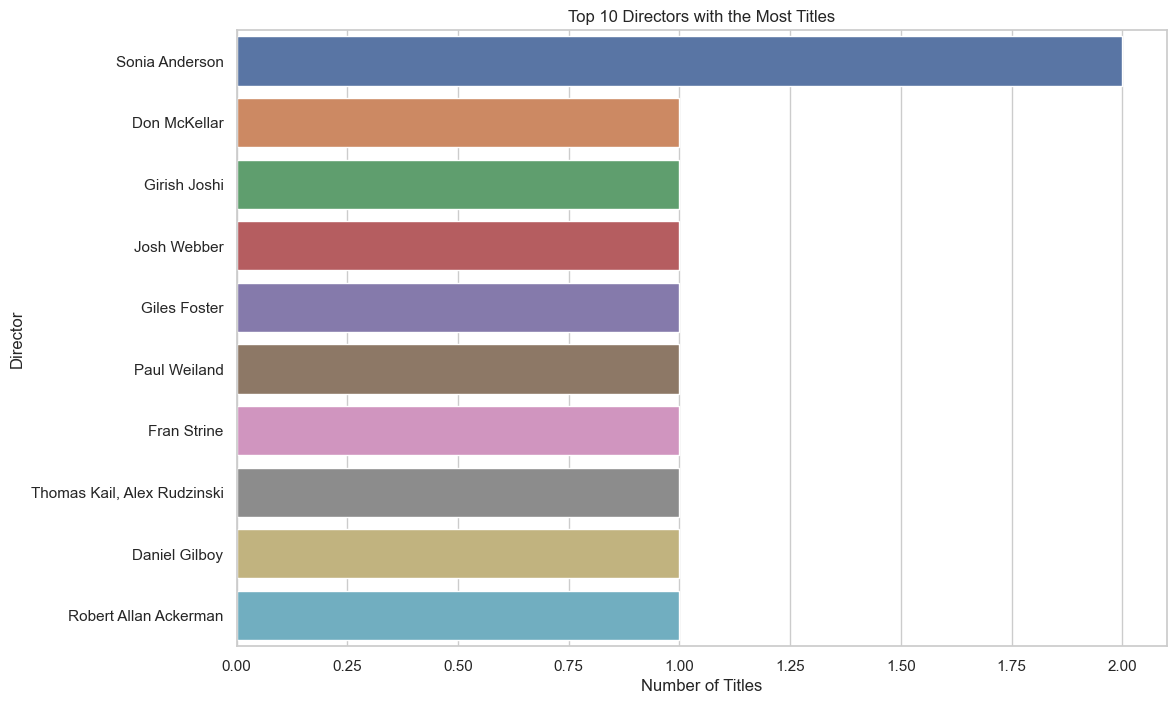

In [138]:
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

# 6. Distribution of Titles Added by Month - Line Plot

C:\Users\abini\AppData\Local\Temp\ipykernel_25956\4254052532.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=monthly_added.index, y=monthly_added.values, marker='o', linestyle='-', palette='viridis')
c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


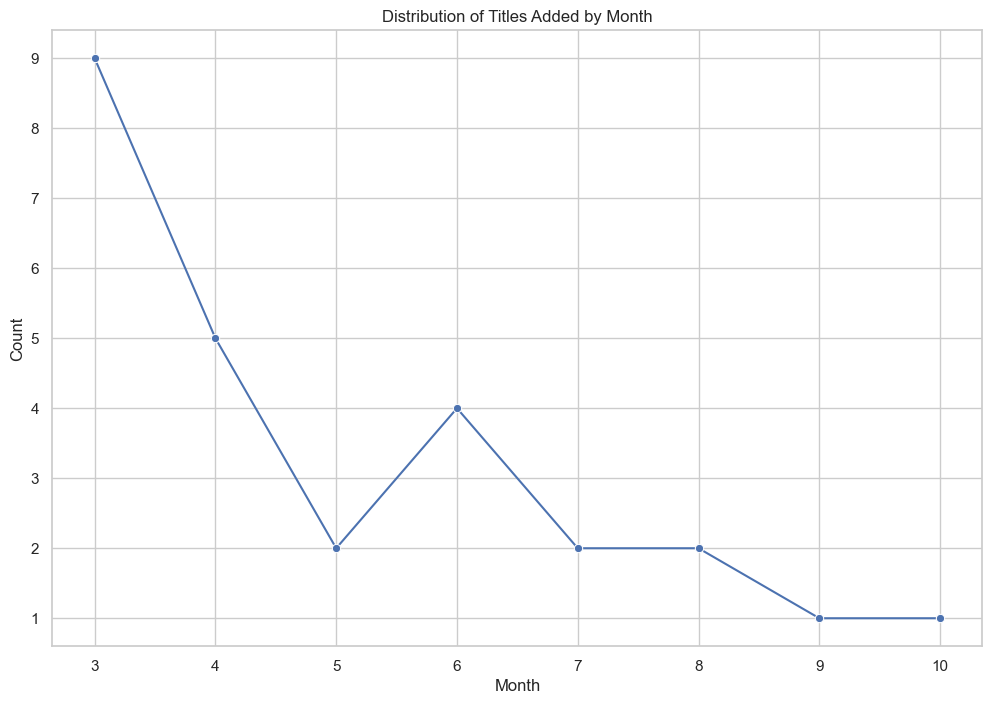

In [139]:
df['month_added'] = df['date_added'].dt.month
monthly_added = df['month_added'].value_counts().sort_index()
plt.figure(figsize=(12, 8))
sns.lineplot(x=monthly_added.index, y=monthly_added.values, marker='o', linestyle='-', palette='viridis')
plt.title('Distribution of Titles Added by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# 7. Distribution of Titles by Duration - KDE Plot

C:\Users\abini\AppData\Local\Temp\ipykernel_25956\2103104570.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['duration'].dropna(), shade=True, color='r')
c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


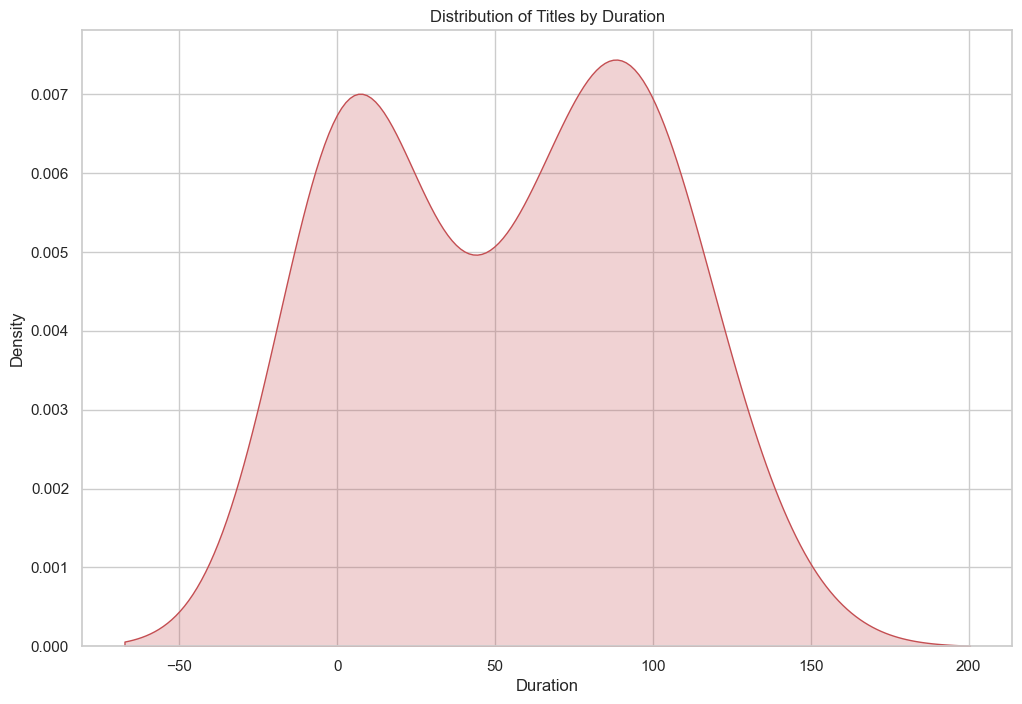

In [140]:

if 'duration' in df.columns:
    plt.figure(figsize=(12, 8))
    df['duration'] = df['duration'].str.extract('(\d+)').astype(float)  # Extract numeric part
    sns.kdeplot(df['duration'].dropna(), shade=True, color='r')
    plt.title('Distribution of Titles by Duration')
    plt.xlabel('Duration')
    plt.ylabel('Density')
    plt.show()

# 8. Word Cloud of Movie Titles

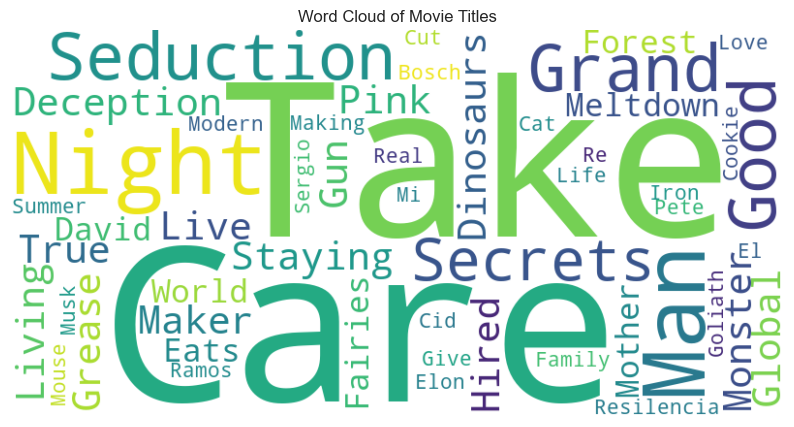

In [141]:
text = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()

# 9. Correlation Heatmap

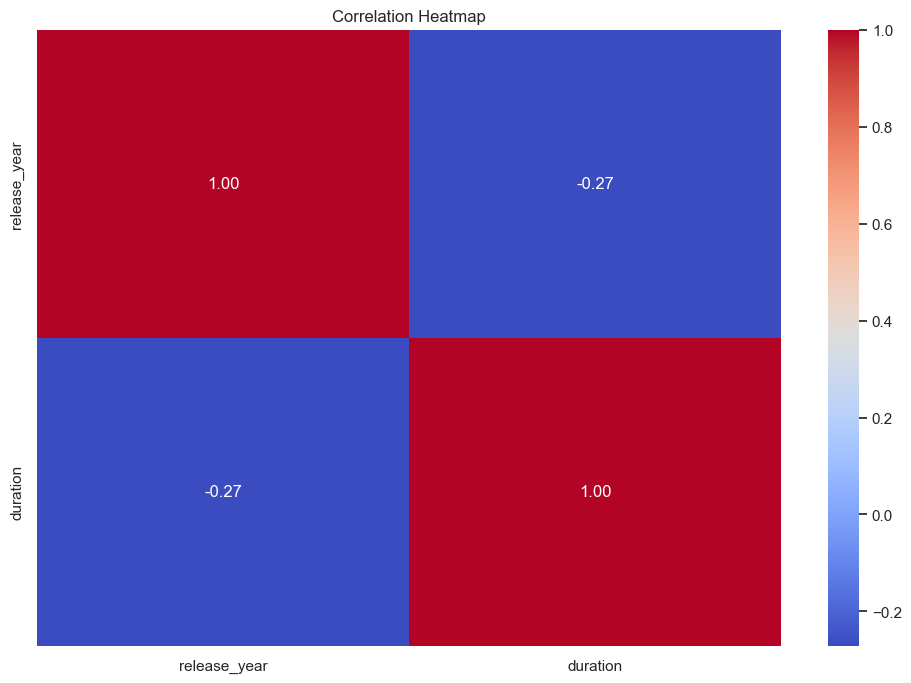

In [142]:

numerical_cols = df.select_dtypes(include=['int64', 'float64'])
if not numerical_cols.empty:
    plt.figure(figsize=(12, 8))
    sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

## **Summary Statistics**

**Content Types**: 7814 Movies and 1854 TV Shows.

**Release Years**: Range from 1920 to 2021.

**Directors**: 5774 unique directors, with Sonia Anderson having the highest number of titles (2).

**Countries**: Content from 86 different countries, with the United States leading (253 entries).

**Genres**: Various genres, with Drama being the most common (3687 entries).

**Ratings**: 24 unique ratings, with '13+' being the most frequent (2117 entries).